# Steps in Time Series Analysis
1. Data Ingestion
2. EDA of the Data
3. Preprocessing of Data
4. Model building
5. Model Evaluation

# Data Ingestion
- Import the required libraries such as pandas , numpy , matplotlib , seaborn ,etc
- Load the data
- Load the Time Series Data into pandas dataframe
- Set the datetime column as index of the dataframe
- Check the datatype of the index and convert it to datetime if necessary

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os , sys

In [2]:
data = pd.read_csv('D:\Python\pwskills-Data_Science_Masters\Time_Series\TSLA.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
#univariate timeseries using close price
stock_data =data[['Date','Close']]

In [5]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [7]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

C:\Users\tejas\AppData\Local\Temp\ipykernel_10472\3223796615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [9]:
stock_data.head(2)

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001


In [10]:
stock_data.set_index('Date',inplace=True)

In [11]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


## why we are converting date column as index column

1. I can easily retrieve the data
2. Visualiaztion is simple
3. Scipy and statsmodels libraries are designed in such a way that it requires the datetime in index.

# EDA(exploratory data analysis)
1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [12]:
# Summary statistic
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


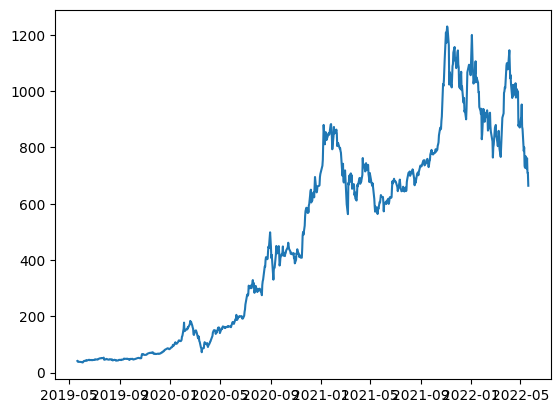

In [13]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

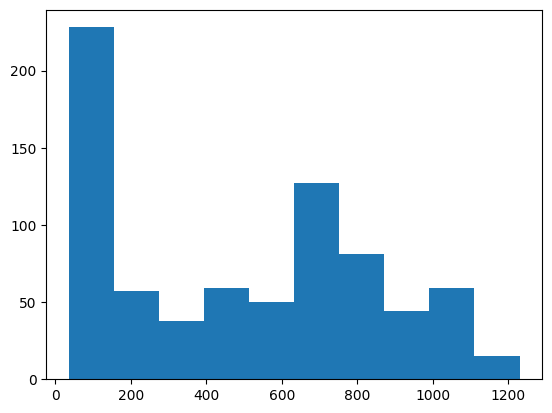

In [14]:
plt.hist(stock_data.Close)

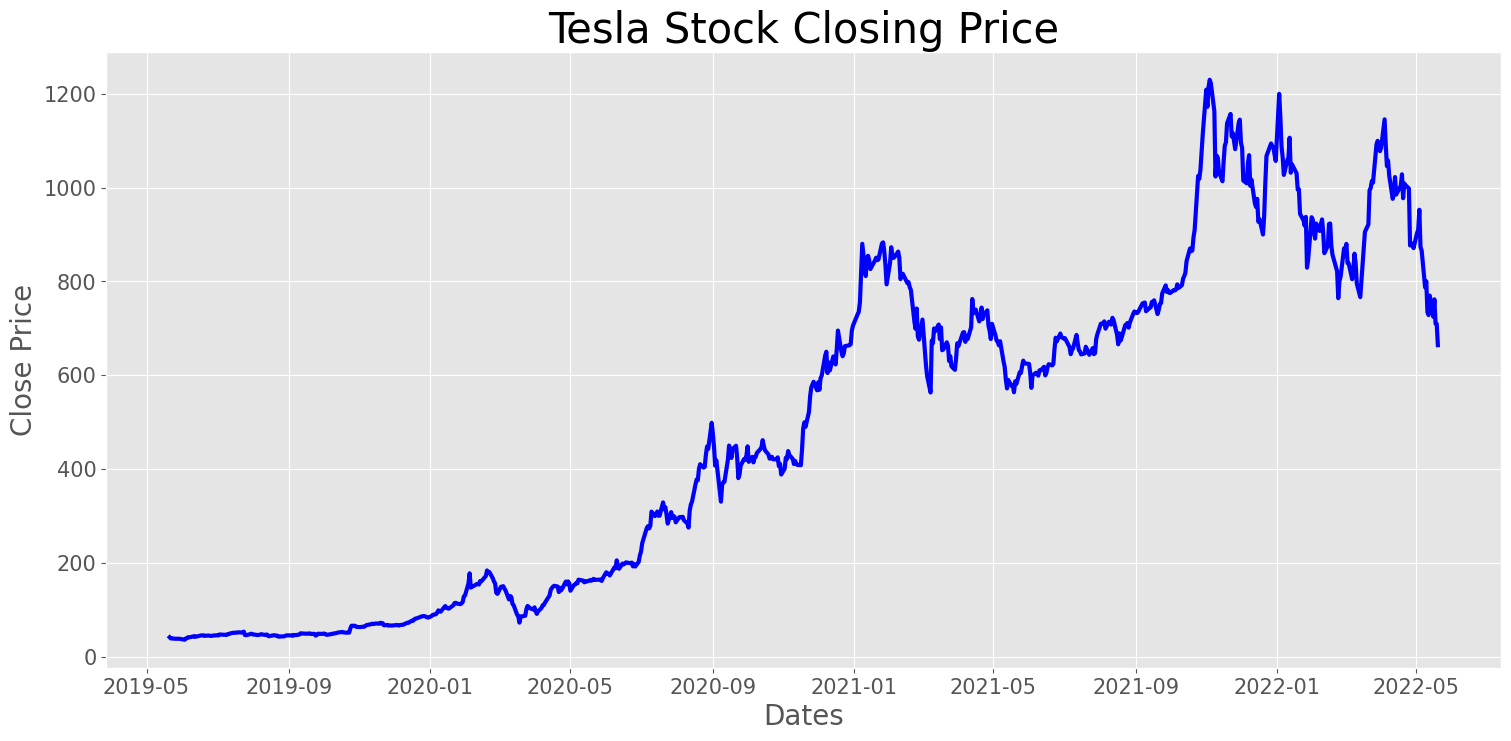

In [15]:
#plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Price' , fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'] , linewidth = 3 , color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

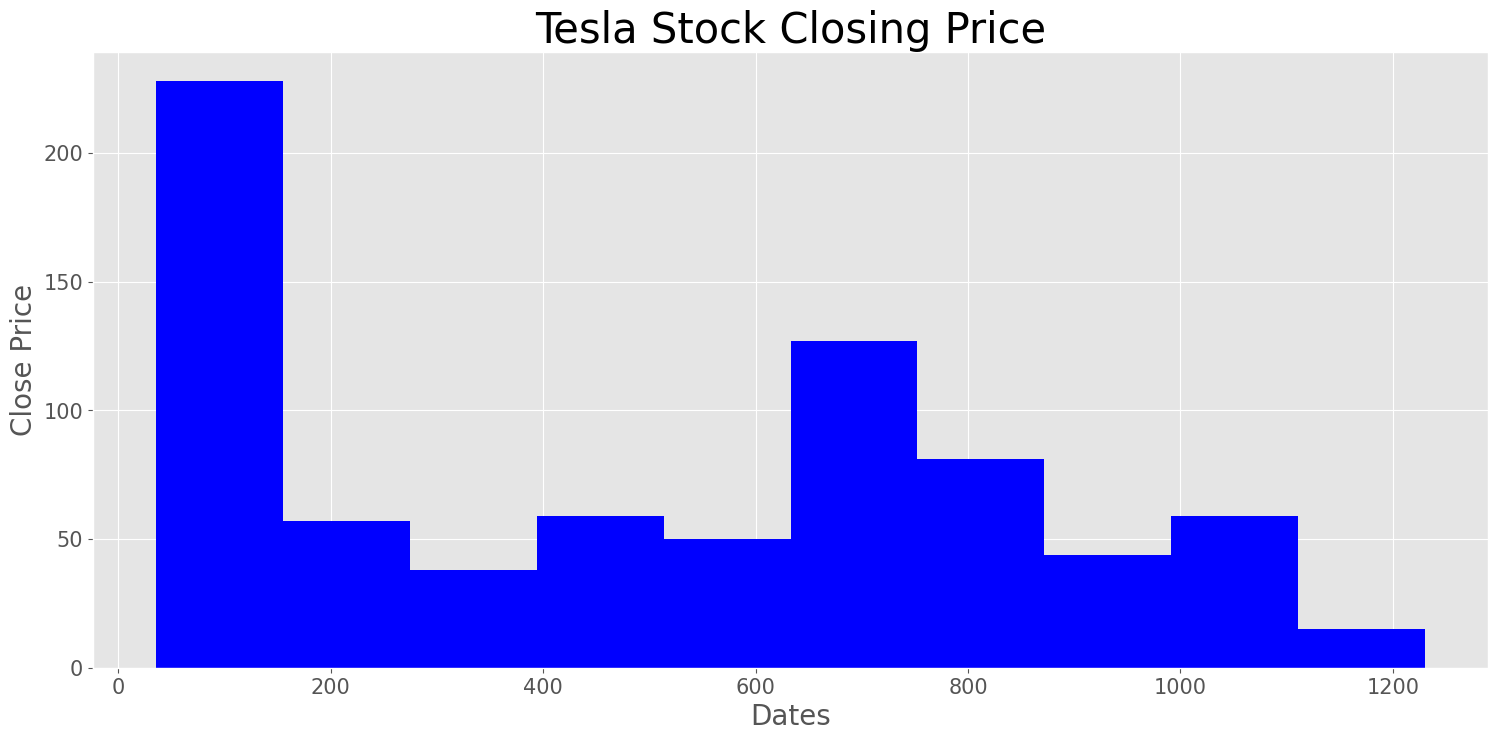

In [16]:
#plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Price' , fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'] , linewidth = 3 , color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

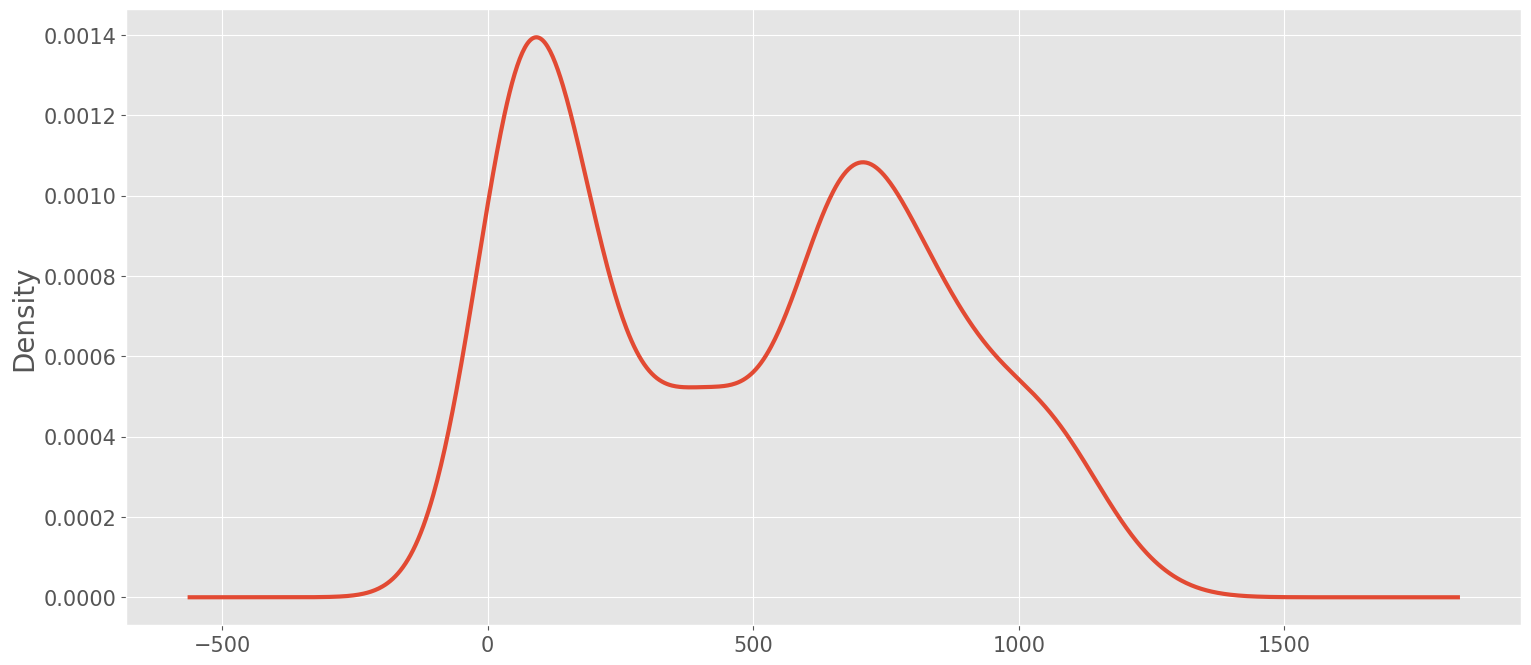

In [17]:
# Distribution of the close price
df_close = stock_data['Close']
df_close.plot(kind='kde', figsize= (18,8), linewidth = 3)
plt.xticks(fontsize = 15)
plt.grid('both')
plt.ylabel('Density',fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [18]:
## Rolling mean and Rolling standard deviation
rolmean = stock_data['Close'].rolling(window=60).mean()

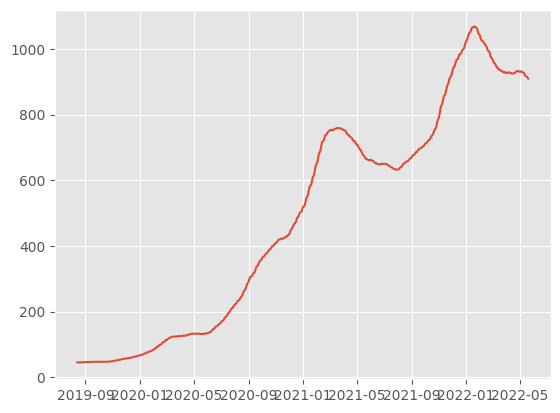

In [19]:
plt.plot(rolmean)

In [20]:
rolstd = stock_data['Close'].rolling(window=60).std()

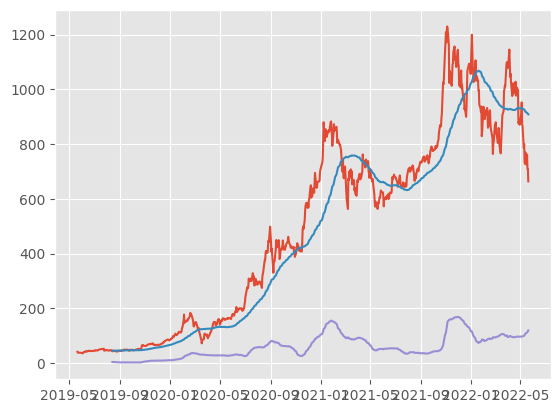

In [21]:
plt.plot(stock_data['Close'])
plt.plot(rolmean)
plt.plot(rolstd)

In [22]:
#ADF(ada fuller test)
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data['Close'])

In [23]:
pd.Series(adft[:4],index=['test stats' , 'p - value' , 'lag value', 'data points'])

test stats      -1.363009
p - value        0.599876
lag value        9.000000
data points    748.000000
dtype: float64

### p-value is > 0.05 therefore Null hypothesis = Data is non-stationary stands accepted

In [24]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

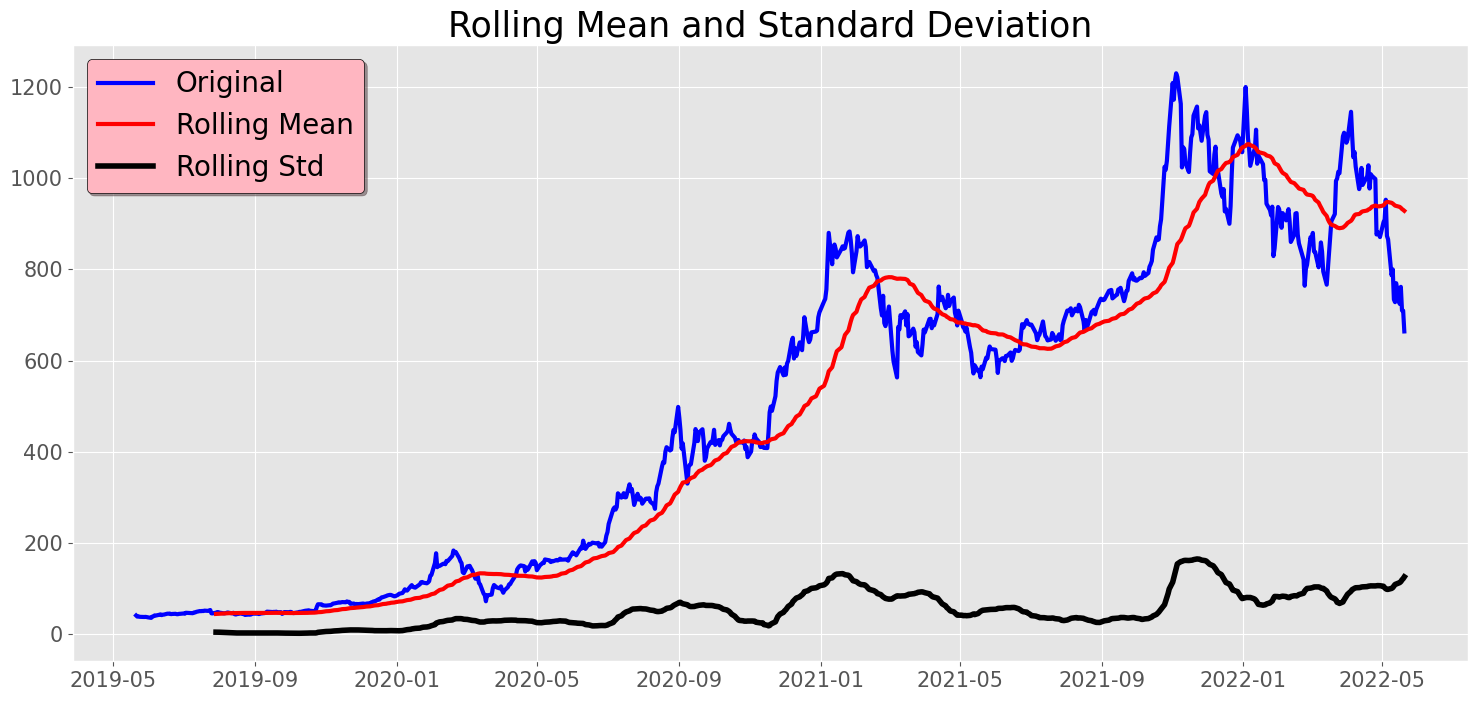

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [25]:
test_stationarity(stock_data['Close'])

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data['Close'],period=12)

In [27]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

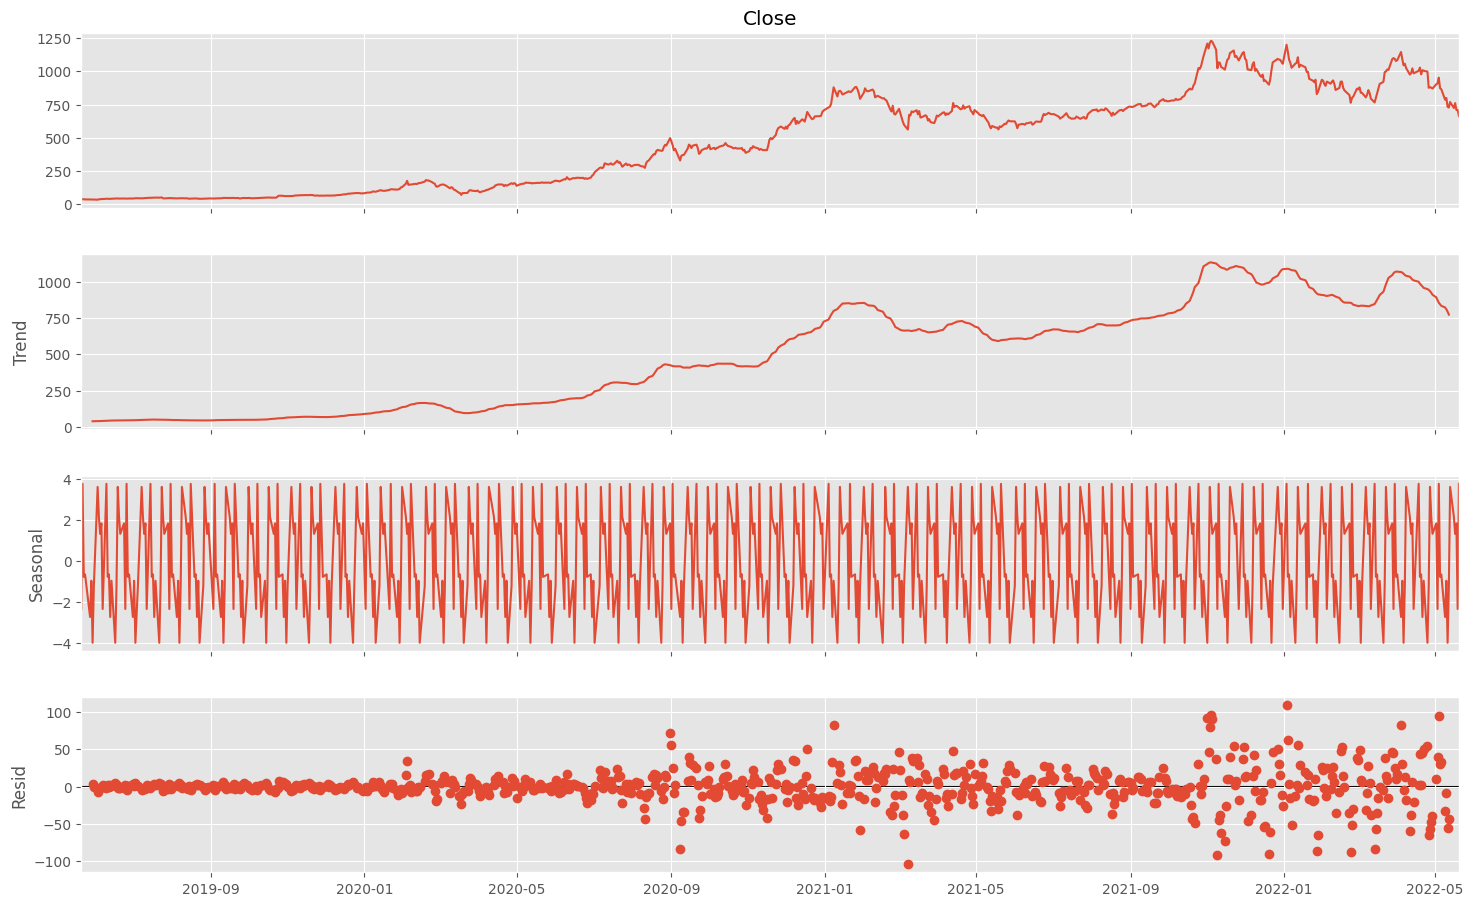

In [28]:
fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

<Figure size 2000x1000 with 0 Axes>

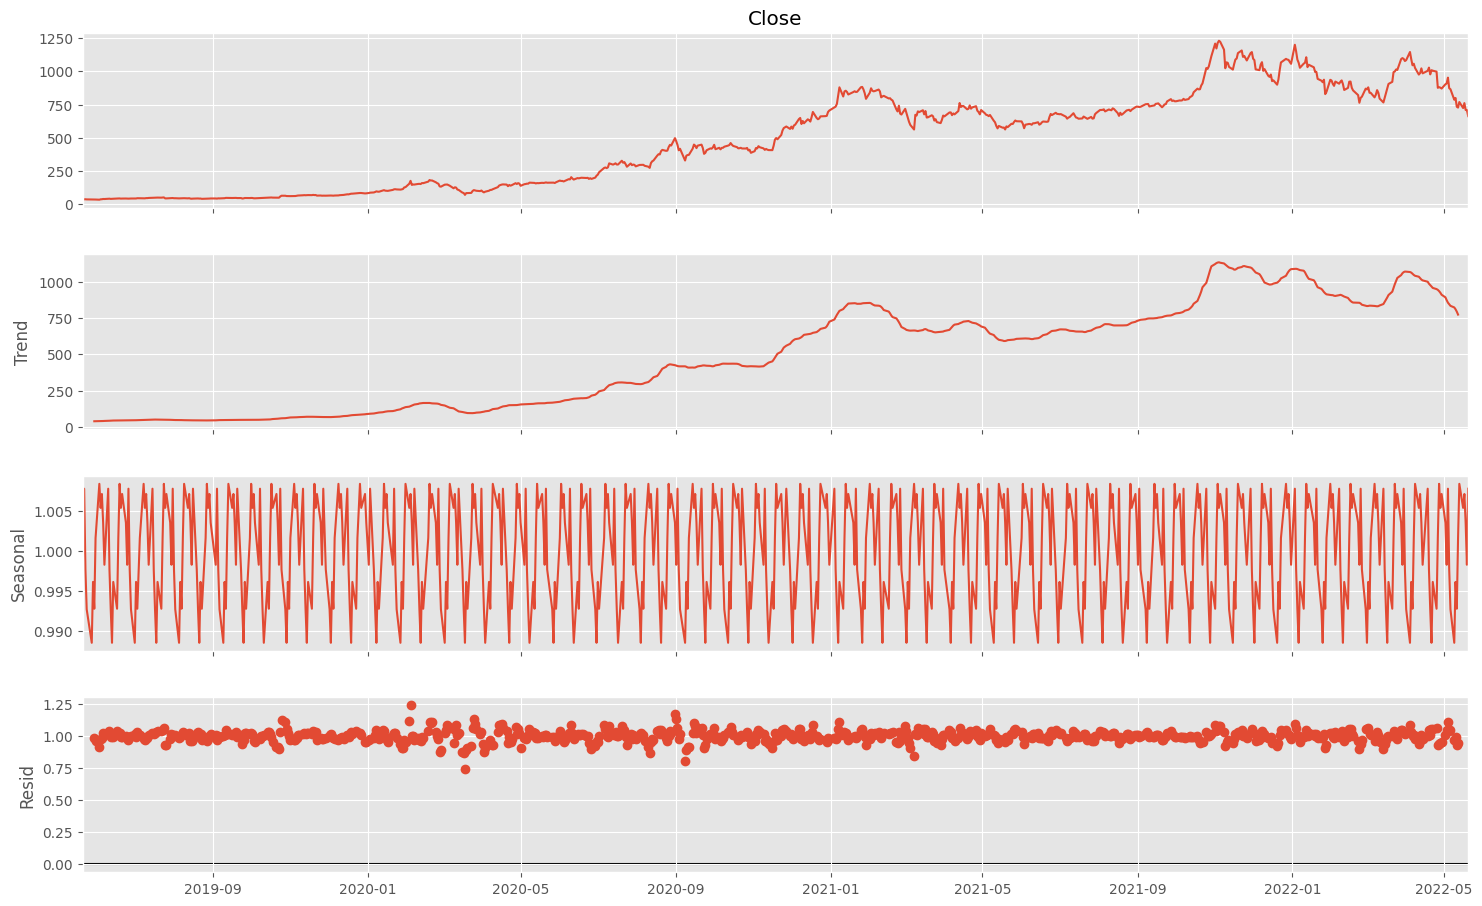

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data['Close'],period=12,model="multiplicative")
fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

<Axes: >

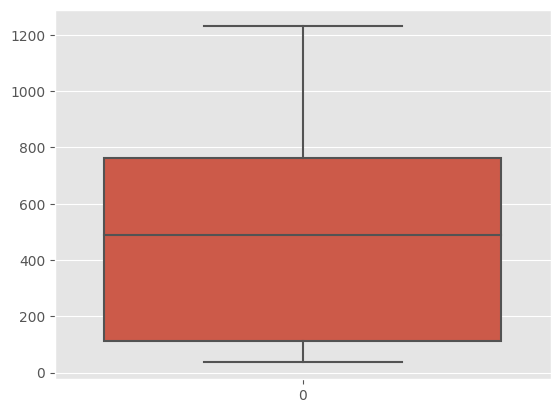

In [30]:
sns.boxplot(stock_data['Close'])

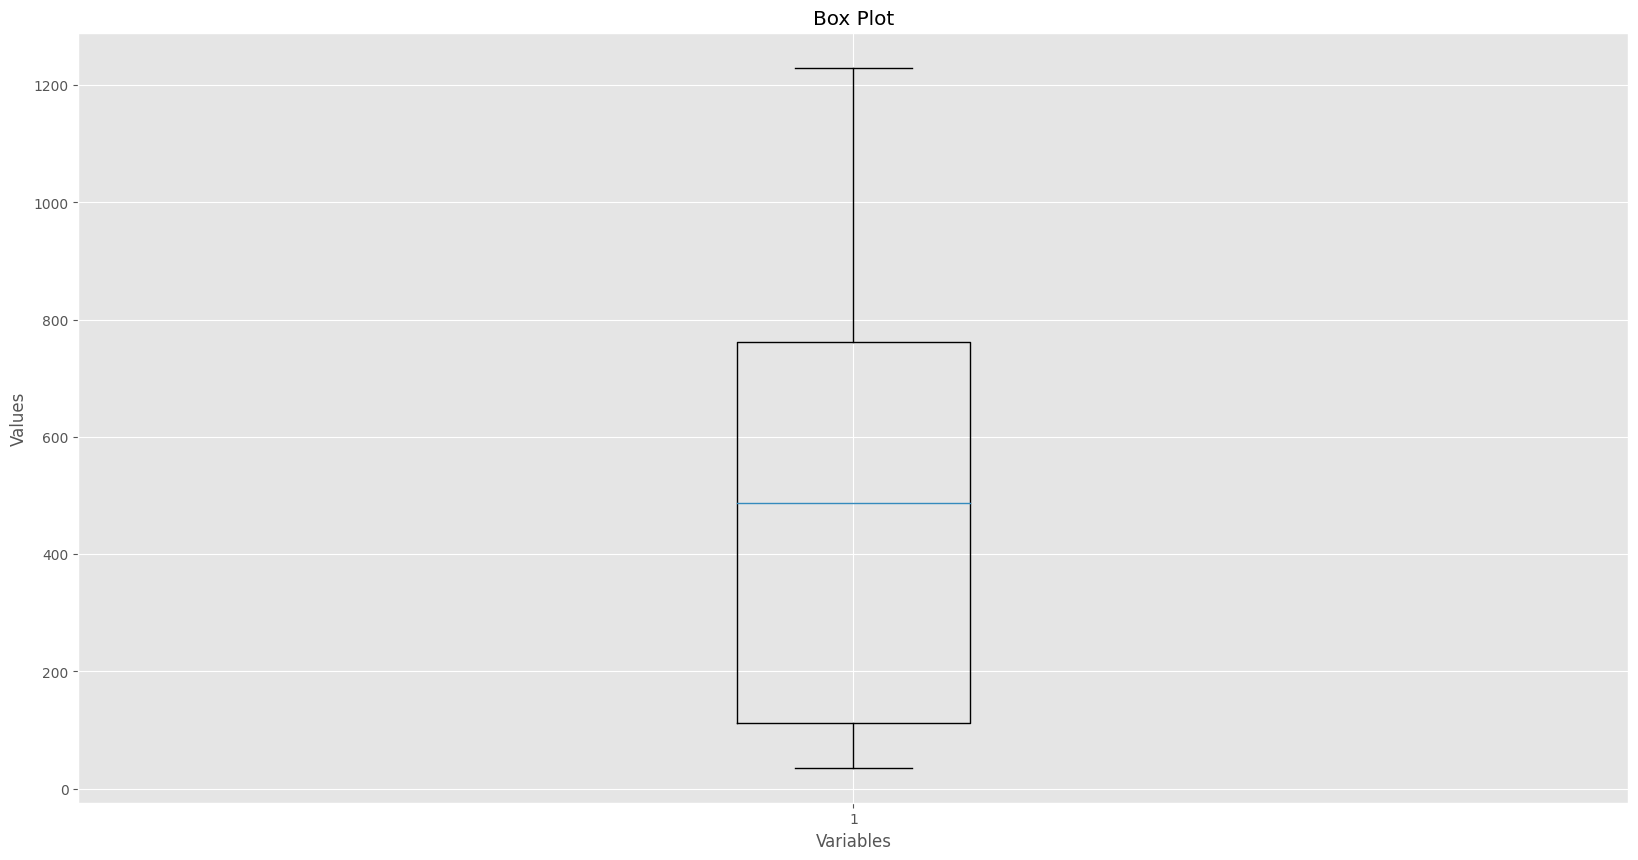

In [31]:
fig , ax = plt.subplots(figsize=(20,10))
#Plot the box plot
ax.boxplot(stock_data['Close'])
#Set the x-axis label
ax.set_xlabel('Variables')
#Set the y-axis label
ax.set_ylabel('Values')
#Set the title
ax.set_title('Box Plot')
#Show the plot
plt.show()

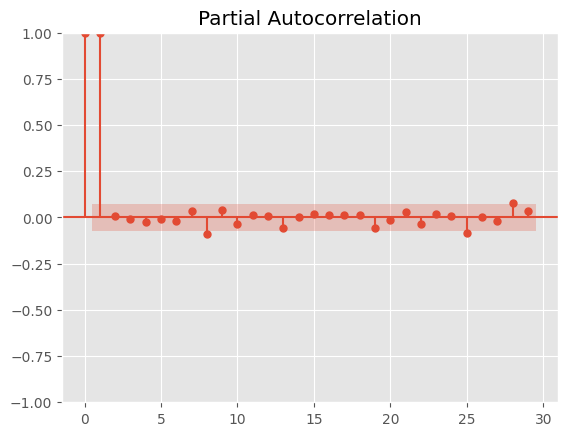

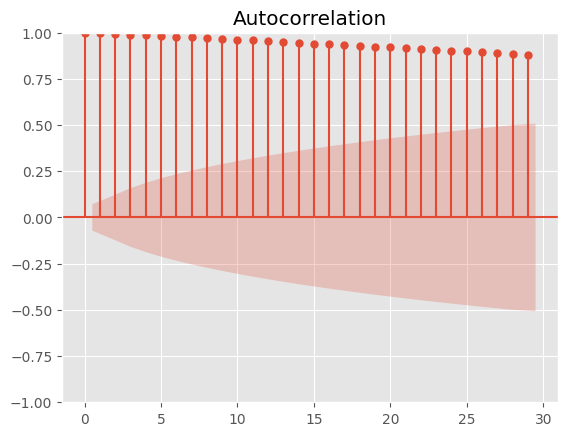

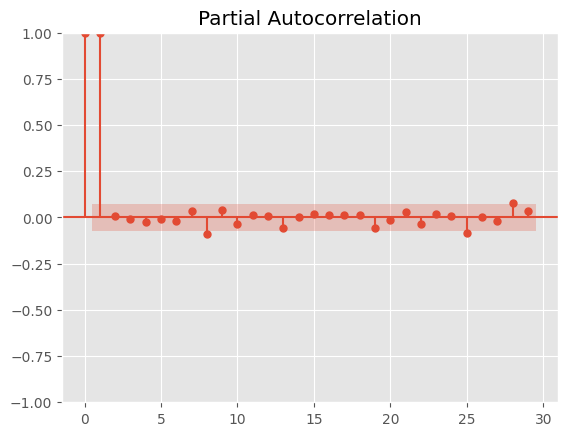

In [32]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(stock_data['Close'])
plot_pacf(stock_data['Close'])

# Preprocessing of the data

1. Fill the missing values (not required here)
2. Convert data into the stationary time series
3. If necessary then normalize the data (not required here)
4. Split the data into train and test
5. Clean the data by removing outliers (not required here)

In [33]:
df_close = stock_data['Close']

In [34]:
df_close  = df_close.diff()

In [35]:
df_close.dropna(inplace=True)

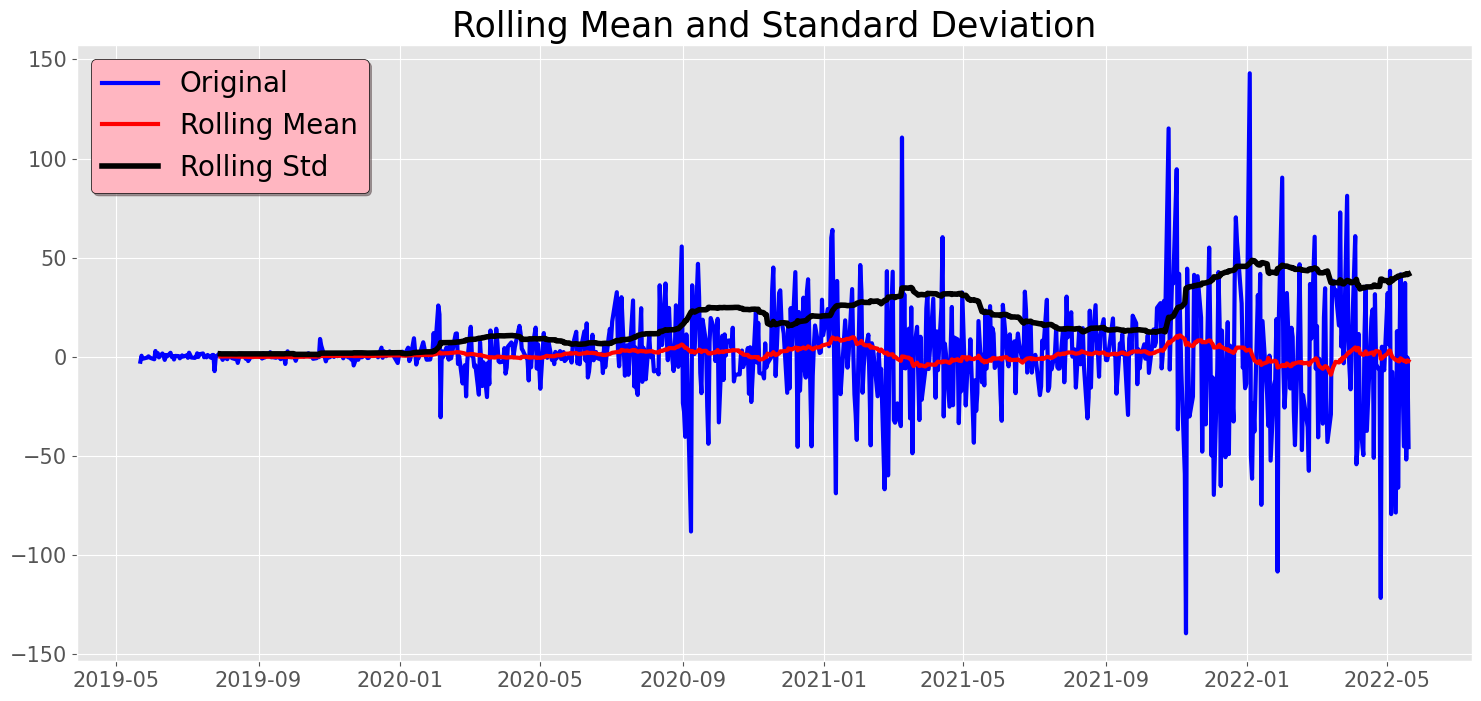

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [36]:
test_stationarity(df_close)

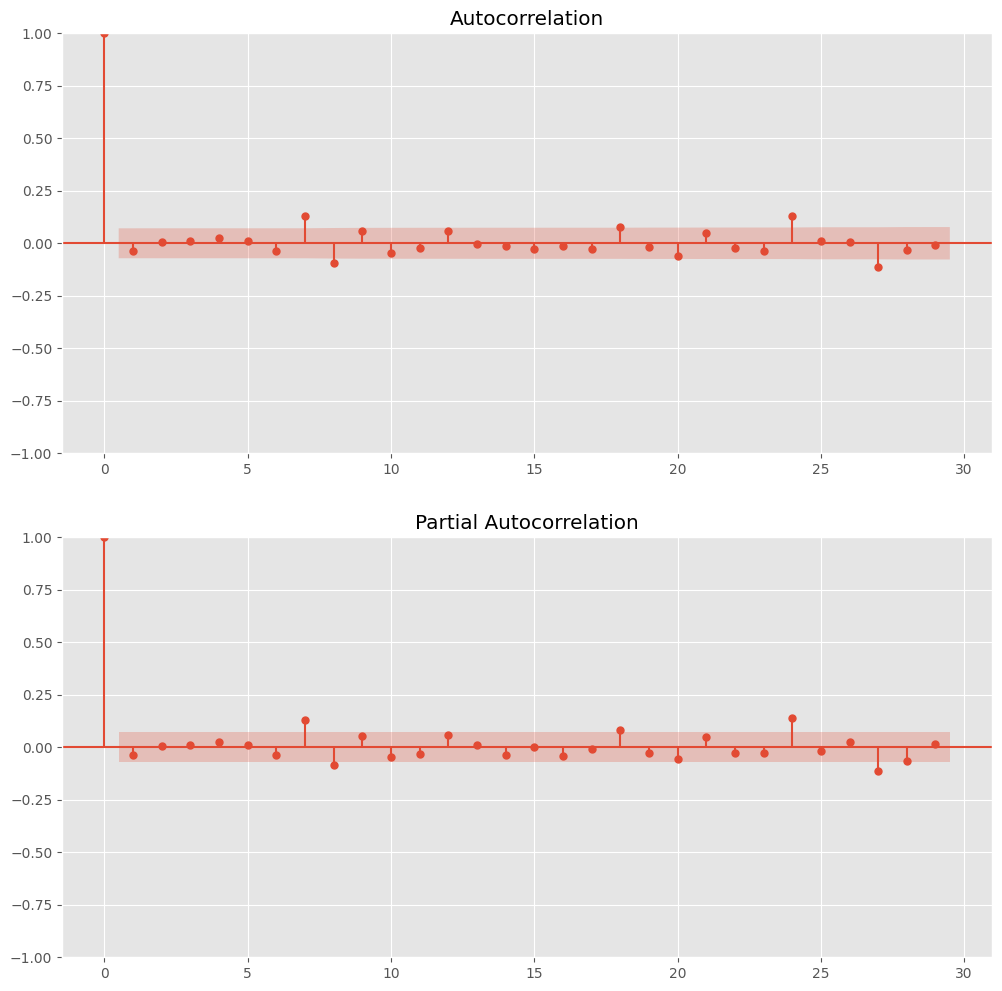

In [37]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211) #function
fig = plot_acf(df_close,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_close,ax=ax2)

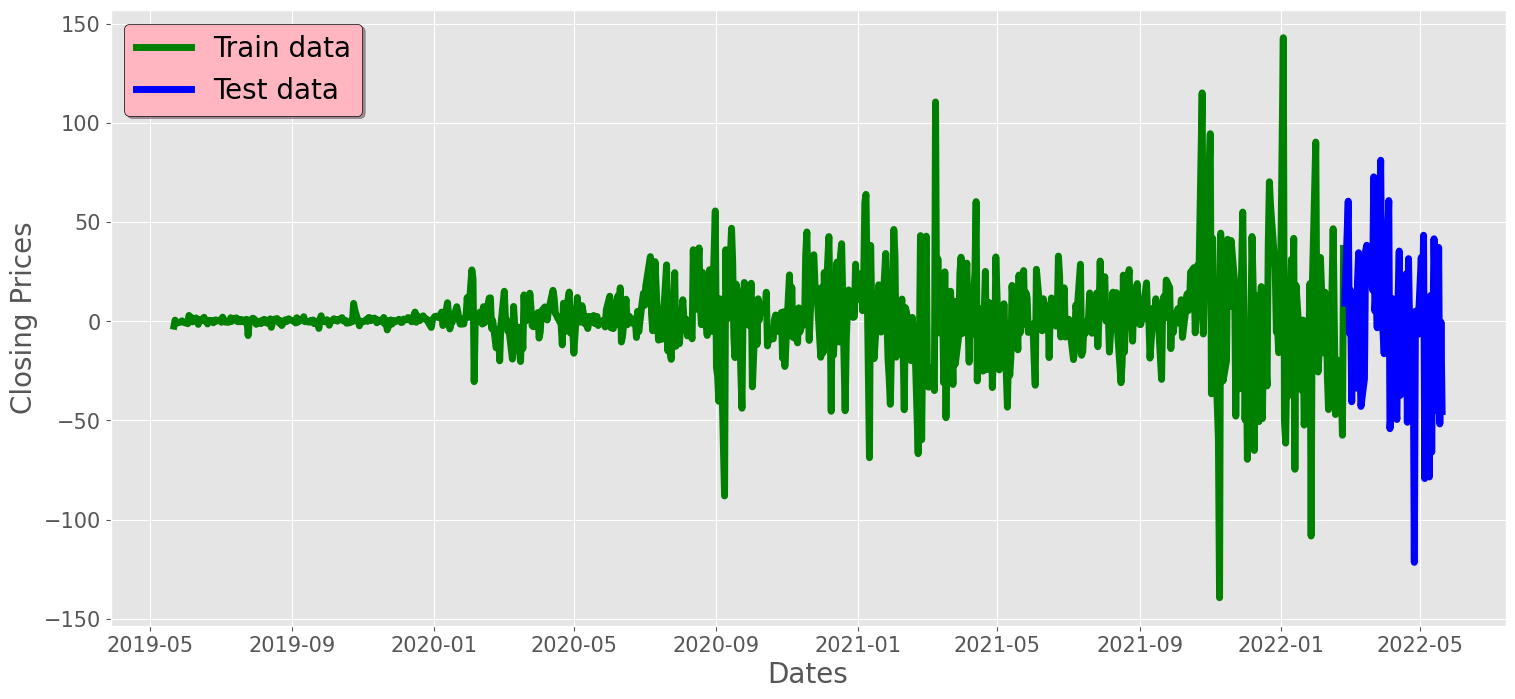

In [38]:
# Split data into train and test set
train_df = df_close[:-60]
test_df = df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates' , fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(train_df , 'green' , label = 'Train data' , linewidth = 5)
plt.plot(test_df , 'blue' , label = 'Test data' , linewidth = 5)
plt.legend(fontsize = 20 , shadow = True , facecolor = 'lightpink' , edgecolor = 'k')

In [39]:
import statsmodels.api as sum
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

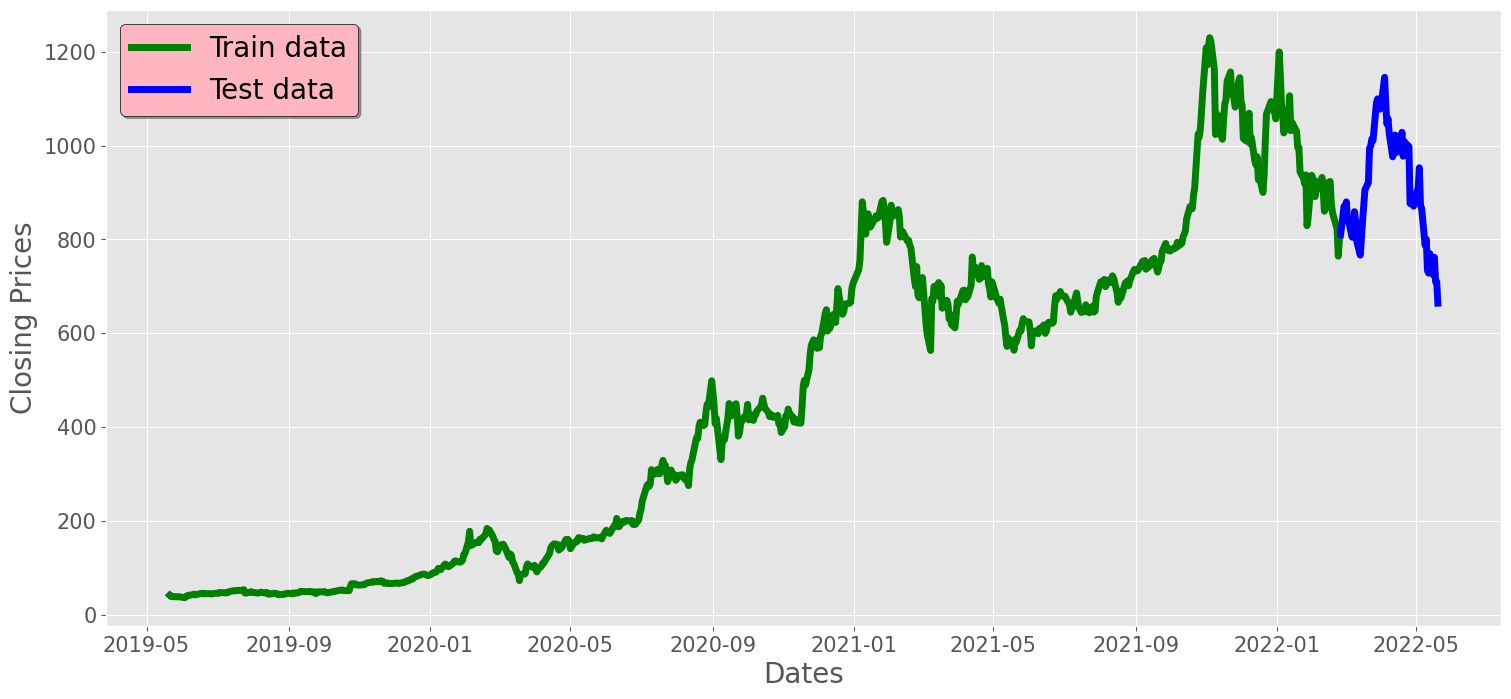

In [44]:
train_data = stock_data['Close'][:-60]
test_data = stock_data['Close'][-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates' , fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(train_data , 'green' , label = 'Train data' , linewidth = 5)
plt.plot(test_data , 'blue' , label = 'Test data' , linewidth = 5)
plt.legend(fontsize = 20 , shadow = True , facecolor = 'lightpink' , edgecolor = 'k')

In [45]:
history = [x for x in train_data]

In [46]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [48]:
model = ARIMA(history , order=(1,1,1))

In [49]:
model

In [50]:
model = model.fit()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Sun, 28 May 2023   AIC                           6306.700
Time:                        23:03:33   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model.forecast()

array([800.20438317])

In [55]:
test_data[0]

809.8699951171875

In [56]:
# model.predict() read about this

In [59]:
mse = mean_squared_error([test_data[0]],model.forecast())
mse

93.42405426268355

In [60]:
rmse = np.sqrt(mse)
rmse

9.665611944552893

In [61]:
p_value = range(0,3)
d_value = range(0,3)
q_value = range(0,3)

In [62]:
for i in p_value:
    for j in d_value:
        for k in q_value:
            print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [67]:
def train_arima_model(X,y,arima_order):
    #prepare training dataset
    #make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history , order= arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [68]:
def evaluate_models(dataset , test , p_values , d_values , q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset , test , order)
                    if rmse < best_score:
                        best_score , best_cfg = rmse , order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg , best_score))


In [69]:
import warnings
warnings.filterwarnings('ignore')
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
evaluate_models(train_data , test_data , p_values , d_values , q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.163
ARIMA(0, 0, 2) RMSE=170.658
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.579
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.598
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.690
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.738
ARIMA(2, 2, 2) RMSE=39.732
Best ARIMA(2, 0, 0) RMSE=39.440


In [77]:
history = [x for x in train_data]
predictions = list()
for i in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model = model.fit()
    fc = model.forecast()
    predictions.append(fc)
    history.append(test_data[i])
print(f"RMSE is {np.sqrt(mean_squared_error(test_data,predictions))}")


RMSE is 39.43992710808545


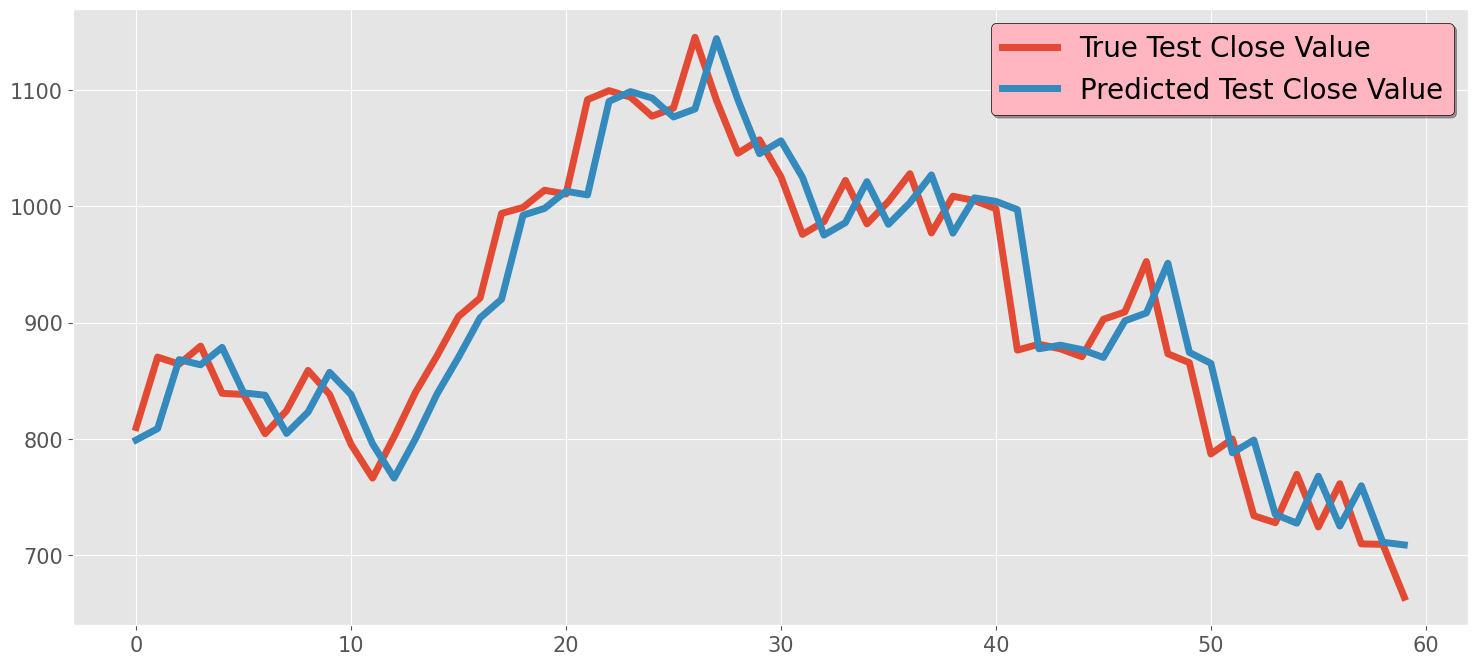

In [78]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data,label = 'True Test Close Value' , linewidth = 5)
plt.plot(range(len(predictions)),predictions,label = 'Predicted Test Close Value' , linewidth = 5)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20 , shadow = True , facecolor = 'lightpink' , edgecolor = 'k')
plt.show()

In [79]:
fc_series = pd.Series(predictions , index = test_data.index)

In [80]:
fc_series

Date
2022-02-25     [799.1426184540103]
2022-02-28     [808.9792965128339]
2022-03-01     [868.2636062842837]
2022-03-02     [863.8102197591892]
2022-03-03     [878.7857732109796]
2022-03-04     [839.6820007673185]
2022-03-07     [837.6330763886795]
2022-03-08     [804.8108052465391]
2022-03-09     [823.1708648541446]
2022-03-10     [857.3630330015519]
2022-03-11      [838.198454930651]
2022-03-14     [795.7993729972145]
2022-03-15     [766.3876558353086]
2022-03-16     [800.3567177065687]
2022-03-17     [838.7344214514233]
2022-03-18     [870.3305573778796]
2022-03-21     [904.1555129760334]
2022-03-22     [920.2058687835413]
2022-03-23      [992.457369029841]
2022-03-24     [998.2717332008363]
2022-03-25    [1013.0300798078472]
2022-03-28    [1009.8950360950225]
2022-03-29    [1090.2962300449612]
2022-03-30    [1098.7386952096913]
2022-03-31    [1093.2588308181776]
2022-04-01    [1076.9429688102518]
2022-04-04    [1083.7653668143191]
2022-04-05    [1144.2943420468787]
2022-04-06    [

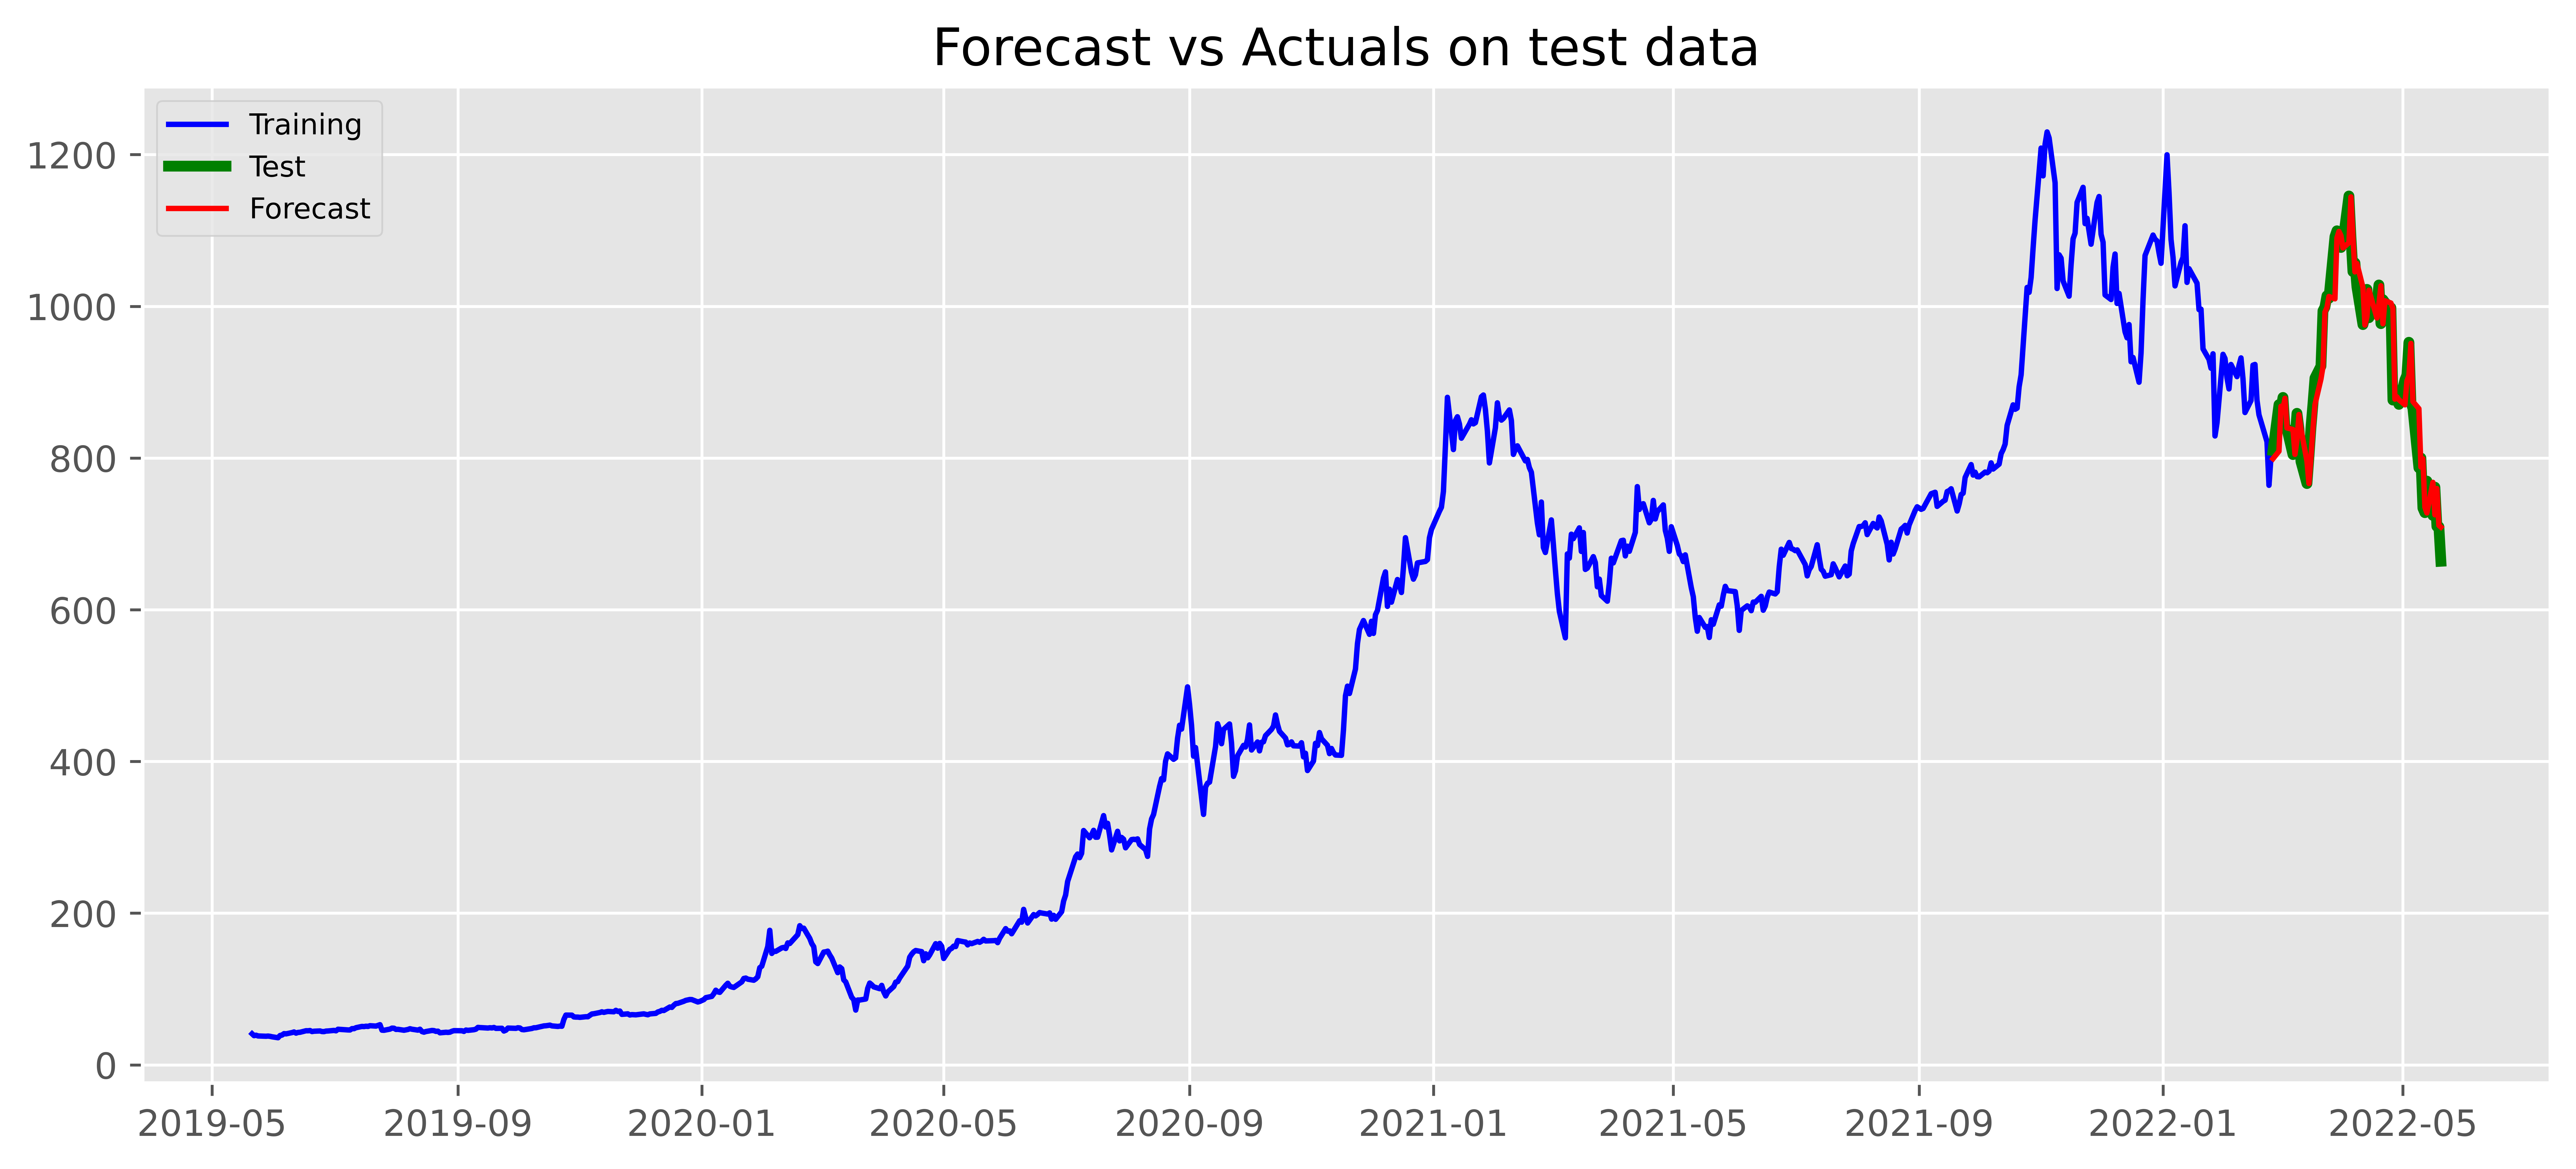

In [85]:
plt.figure(figsize=(12,5),dpi=1000)
plt.plot(train_data , label = 'Training' ,color='blue')
plt.plot(test_data , label = "Test" , color = 'green', linewidth = 3)
plt.plot(fc_series , label = 'Forecast' , color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left',fontsize=8)
plt.show()


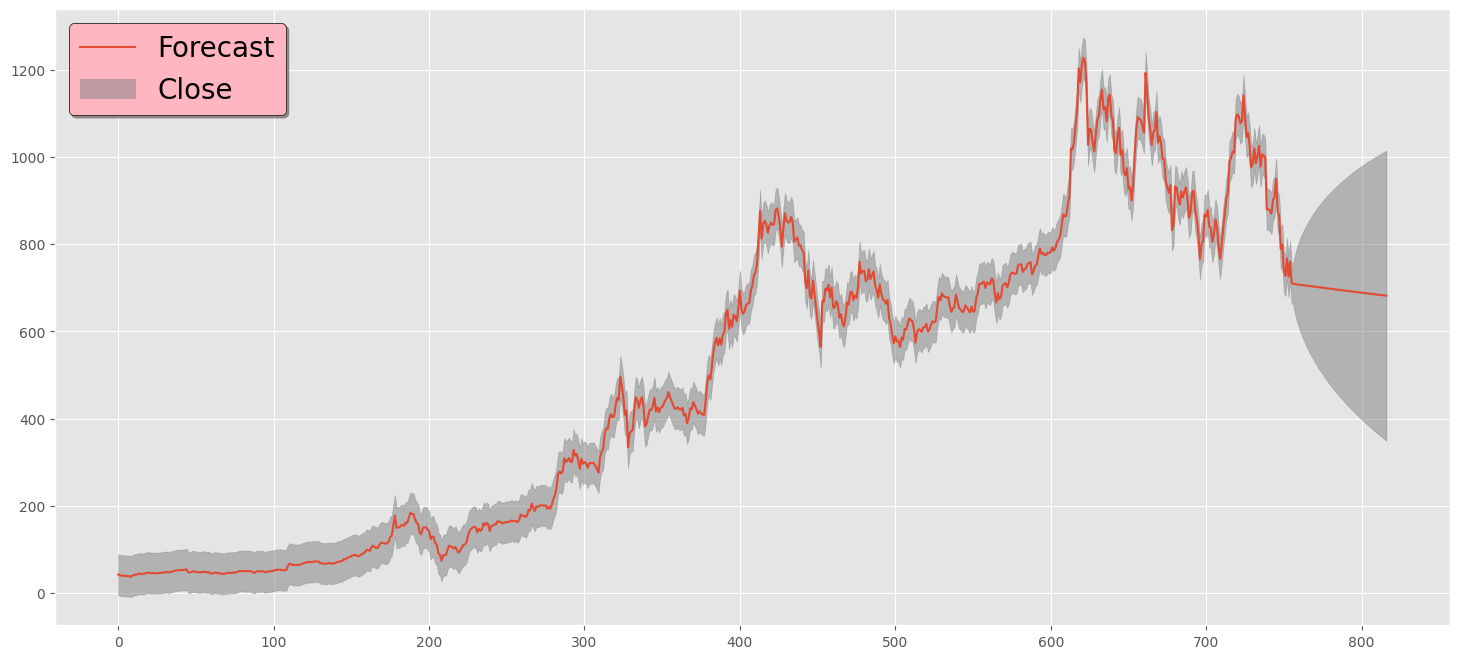

In [87]:
from statsmodels.graphics.tsaplots import plot_predict
fig= plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model ,start=1 , end=len(df_close)+60, ax=ax1)
plt.legend(['Forecast','Close',r'95% confidence interval'],fontsize=20, shadow=True,facecolor='lightpink',edgecolor='k')
plt.show()

In [90]:
# evaluate parameters
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 39.73948196801558


In [91]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  757
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 3)   Log Likelihood               -3467.388
Date:                             Mon, 29 May 2023   AIC                           6940.777
Time:                                     00:16:06   BIC                           6954.649
Sample:                                          0   HQIC                          6946.121
                                             - 757                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L3       -0.0084      0.032     -0.260      0.795      -0.072       0.055
ma.S.L3       -0.9723      0.007   -130.452      0.000      -0.987      -0.958
sigma2       578.2377     14.350     40.294      0.000     550.111     606.364
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):              1458.69
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):              38.37   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

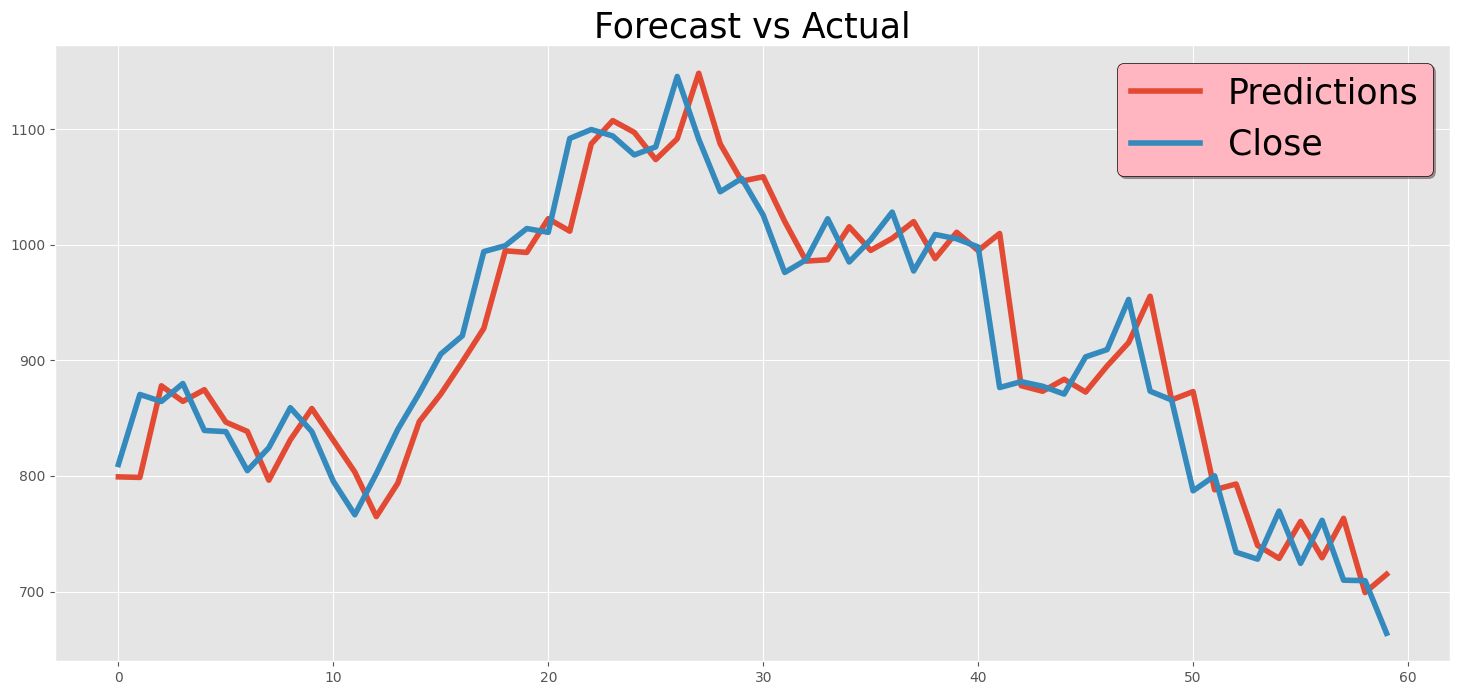

In [93]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')